# Get Started building with Weave
In this tutorial, you will learn how to use Weave to build an interactive dashboard to help you explore, understand, and evaluate machine learning models.

After this tutorials, you'll know how to build a dashboard to:
- explore inputs, outputs & labels of your models
- calculate and plot metrics about your models
- interactively build live, connected plots to drill deeper into your data
- publish sharable interactive dashboards to enable colleagues to build on your work

# Hello, World

First, install `weave`:

In [ ]:
!pip install weave -qqq

Next, we'll use Weave to explore the Iris flower dataset.

In [ ]:
from sklearn.datasets import load_iris

def get_iris_dataset():
    iris = load_iris(as_frame=True)
    data = iris['data']
    data['target_id'] = iris['target']
    data['target_name'] = iris['target_names'][iris['target']]

    def clean_column_name(c):
        return c.replace(" (cm)", "").replace(" ", "_")
    data.columns = [clean_column_name(c) for c in data.columns]
    return data

iris_df = get_iris_dataset()

Now that we have a dataframe, we can display it in an interactive table by calling `weave.show`.

In [ ]:
import weave
weave.show(iris_df)

This is already a lot more powerful that the static visualization of a pandas `DataFrame` because you can page through it——and we're just getting started.

# Building plots

Weave can dynamically create visualizations of your data.

- At the top of the panel, click `Table`
- You should see a dropdown, click `Plot`

You should now see a plot of `sepal_width` versus `sepal_length`, colored by `target_name`. Weave's visualization engine uses the type of each column to choose a reasonable way to display your data. You can edit this plot by clicking the pencil icon ✏️ in the top right of the panel to open the panel editor.

Note: You can build these plots interactively using the UI or define them programmatically in Python. In this tutorial, we'll focus on building these dashboards using the UI and keep programmatic dashboard building for later tutorials. 

!['image'](https://raw.githubusercontent.com/wandb/weave/4885095070704922189ba4d761029821c4e5da42/docs/assets/get_started_1.png)

## Exercise
- Try changing the X and Y axes
- Try changing the color

Tip: `row["<column name>"]` is a **Weave Expression**. You can edit the column name inside the quotes to show the relevant column from your data. 

# Exploring Tables

Let's display our data as a `Table` again:

In [ ]:
weave.show(iris_df)

You can add, remove and sort each column by using the three dots button ⋮ beside the column name.

## Exercise
- Try sorting by the `sepal_length` column
- Try removing the `target_id` column

## Filtering

You can filter tables using the funnel icon ▼ on the top left. 

For example, to filter the data to only display the `setosa` flowers:
- Click the filter icon 
- Add the expression `row["target_name"] == "setosa"`

# Transforming data

When analyzing models, you often need to use your data to calculate metrics or statistics to get summaries for comparison.

To enable this, Weave has built-in operations, or **Weave Ops**, to transform data. You can also configure the data displayed in each column as we did with the plot.

For example, to display the sum of each examples' `sepal_width` and `sepal_length`:
- Click a column to edit (e.g. `sepal_length`)
- Change the Cell expression to `row["sepal_width"] + row["sepal_length"]`
- Click anywhere outside the popover to apply the change

# Group by columns to compare splits and calculate summary statistics

Comparing performance across different data splits is vital to uncovering biases and edge cases. This is fast and visual in Weave using the **Group by** operation.

For example, if we want to calculate summary statistics of each type of flower in our dataset, we can group by the `target_name` column.

- Click the three dots button ⋮ on the `target_name` column
- Click `Group by`

We now see that Weave has grouped our data by the `target_name` and made plots for each column. We can now use different operations on these columns because they're now _lists_ rather than individual elements. 

For example, we can calculate the average of each column by changing the cell expression to be `row["<column name>"].avg` e.g. `row["sepal_length"].avg`.

## Exercise 
- Try calculating the maximum of each column

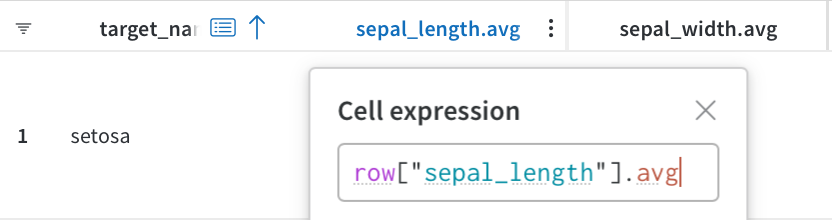

## Drilldown with connected plots

Finally, once you have found a split of data that is interesting, you often want to view individual elements of that data to better understand it. Weave makes it easy to connect multiple visualizations so that you can drilldown into selected data. 

In [ ]:
weave.show(iris_df)

!['image'](https://raw.githubusercontent.com/wandb/weave/4885095070704922189ba4d761029821c4e5da42/docs/assets/get_started_2.png)

For example, to select data from a plot and display it in a table:
- Add a new panel from the drawer menu on the right (1)
- Using the panel name (2), refer to the `.selected_data` from the first panel in the expression editor (3)
- Use the selection tool (4) to display that data in the drilldown table

Tip: You can also connect `Tables` to other plots. To select a row on a table, click the row number. To use that selection, use `<panel_name>.active_data`.

# Publish your dashboard and share it

Once you have something you're happy with, you can click the arrow ↗️ from the drawer menu on the right to open it in a new tab. From there, you can click "Publish board" to send your creation to the cloud and share it with the world. You can also use this area to add new panels and update your dashboard.

# What's next?

With what you've learned, try build something on your own data. Weave works with lots of different types of data and is performant at large scales!

In [ ]:
import numpy
from PIL import Image

def random_image():
    imarray = numpy.random.rand(100,100,3) * 255
    return Image.fromarray(imarray.astype('uint8')).convert('RGBA')

weave.show([{'image_col': random_image(), 'text_col': 'Hello'}, 
            {'image_col': random_image(), 'text_col': 'World'}]*1000)

We're heads down focusing on adding templates and improving our documentation. Weave is open source, and we're very excited to merge your contributions. If you have feedback, feature requests, or bugs, you can open an issue on the Weave Github repository.

## Not finished learning?

Check out our [examples](https://github.com/wandb/weave/tree/master/examples) to see more tutorials, a gallery of dashboards, and reference guides to different components.